In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

In [20]:
max_features = 10000
max_len = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [21]:
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [22]:
x_train.shape

(25000, 200)

In [23]:
model = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=max_len),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
batch_size = 64
epochs = 20

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.5734 - loss: 0.6697 - val_accuracy: 0.6770 - val_loss: 0.5881
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.7826 - loss: 0.4717 - val_accuracy: 0.8008 - val_loss: 0.4466
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9089 - loss: 0.2375 - val_accuracy: 0.7346 - val_loss: 0.5946
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9699 - loss: 0.0952 - val_accuracy: 0.7778 - val_loss: 0.7013
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9681 - loss: 0.0908 - val_accuracy: 0.7580 - val_loss: 0.7342
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9913 - loss: 0.0314 - val_accuracy: 0.7412 - val_loss: 0.9030
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9933 - loss: 0.0225 - val_accuracy: 0.7868 - val_loss: 0.8762
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9929 - loss: 0.0248 - va

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc:.2f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7999 - loss: 1.2279

Test accuracy: 0.80


In [27]:
sample_texts = ["The movie was fantastic! I loved it.",
                "It was the worst film I've ever seen."]


In [28]:
word_index = imdb.get_word_index()
reverse_word_index = {v + 3: k for k, v in word_index.items()}
reverse_word_index[0] = "<PAD>"
reverse_word_index[1] = "<START>"
reverse_word_index[2] = "<UNK>"

In [29]:
def encode_texts(texts):
    sequences = []
    for text in texts:
        words = text.lower().split()
        sequence = [word_index.get(word, 2) for word in words]  # Use 2 for <UNK>
        sequences.append(sequence)
    return pad_sequences(sequences, maxlen=max_len)

encoded_samples = encode_texts(sample_texts)

In [30]:
predictions = model.predict(encoded_samples)
for i, text in enumerate(sample_texts):
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {'Positive' if predictions[i] > 0.5 else 'Negative'}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
Text: The movie was fantastic! I loved it.
Predicted Sentiment: Positive

Text: It was the worst film I've ever seen.
Predicted Sentiment: Positive



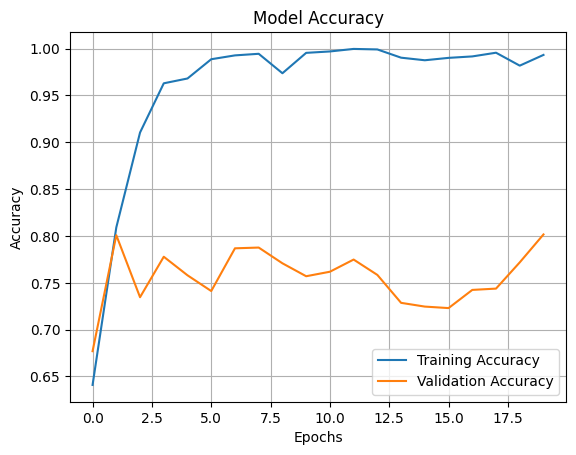

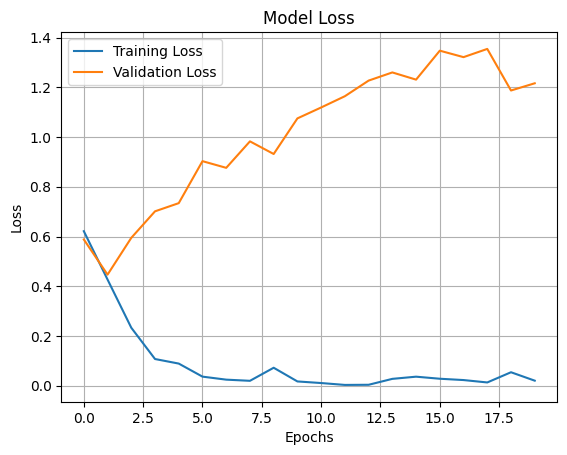

In [31]:
import matplotlib.pyplot as plt

# Plotting Accuracy
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting Loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot graphs
plot_accuracy(history)
plot_loss(history)